#insert from kaggle karena internet lambat untuk upload drive



In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cordoy160","key":"517b910297c71a2608d58d4720999ddc"}'}

In [0]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 95% 292M/306M [00:03<00:00, 39.3MB/s]
100% 306M/306M [00:03<00:00, 89.4MB/s]


###extract ZIP


In [7]:
from zipfile import ZipFile
file_name = "rockpaperscissors.zip"

with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print("Done")

Done


#Menggunakan Upload COLAB

In [0]:
from google.colab import files
files.upload()

In [0]:
from zipfile import ZipFile
file_name = "rockpaperscissors.zip"

with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print("Done")

#STEP
1. Include Depedencies
2. select path file /buat folder Files

In [65]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = 'Files/rps-cv-images/'

print(os.listdir(data_path))

dir_kertas = os.path.join(data_path + 'paper')
dir_batu = os.path.join(data_path + 'rock')
dir_gunting = os.path.join(data_path + 'scissors')


['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']


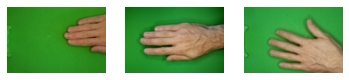

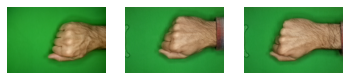

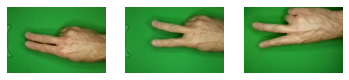

In [66]:
n = 3
for f in [dir_kertas, dir_batu, dir_gunting]:
    for i in range(n):
        sp = plt.subplot(1, n, i + 1)
        sp.axis('Off')
        img = mpimg.imread(f + "/" + os.listdir(f)[i])
        plt.imshow(img)
    plt.show()

## callbacks 

In [0]:
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.04):
            print()
            print("Berhenti apabila mendekati 99%")
            self.model.stop_training = True
callbacks = callBack()

##Buat Model

In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 46, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 23, 35, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 21, 33, 64)      

In [86]:
data_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
# model training
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples / train_generator.batch_size - 1,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples / validation_generator.batch_size - 1,
    callbacks=[callbacks]
)

print(history.epoch, history.history['accuracy'])

Epoch 1/15
13/12 [==============================] - 6s 432ms/step - loss: 0.8903 - accuracy: 0.6190 - val_loss: 0.8448 - val_accuracy: 0.7548
Epoch 2/15
13/12 [==============================] - 6s 429ms/step - loss: 0.4195 - accuracy: 0.8669 - val_loss: 0.2373 - val_accuracy: 0.9231
Epoch 3/15
13/12 [==============================] - 5s 418ms/step - loss: 0.1880 - accuracy: 0.9402 - val_loss: 0.1054 - val_accuracy: 0.9688
Epoch 4/15
13/12 [==============================] - 5s 417ms/step - loss: 0.1228 - accuracy: 0.9563 - val_loss: 0.1230 - val_accuracy: 0.9591
Epoch 5/15
 1/12 [=>............................] - ETA: 0s - loss: 0.0967 - accuracy: 0.9609

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict_classes(images)

  print(fn)
  if classes==0:
    print('Kertas')
  if classes==1:
    print('Batu')
  if classes==2:
    print('Gunting')
